<a href="https://colab.research.google.com/github/chwonghk01/typo-detection/blob/master/colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import auth
auth.authenticate_user()

project_id = 'data-poc-227904'
!gcloud config set project {project_id}

import os
import tensorflow as tf
import json
TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']
with tf.Session(TPU_WORKER) as session:
  # Upload credentials to TPU.
  with open('/content/adc.json', 'r') as f:
    auth_info = json.load(f)
  tf.contrib.cloud.configure_gcs(session, credentials=auth_info)
  # Now credentials are set for all future sessions on this TPU.
  
print(tf.VERSION)
print(tf.keras.__version__)

Updated property [core/project].
1.12.0
2.1.6-tf


In [14]:
!gsutil -m rsync -r gs://hk01dev-typo-detection/repo .

checkpoint_dir = 'gs://hk01dev-typo-detection/ckpt_v2' #@param{'type': 'string'}
train_file = 'gs://hk01dev-typo-detection/repo/dataset_v2_freeze/train_128_0.10_1.00_0.30_0.30_-1.tfrecords' #@param{'type': 'string'}
eval_file = 'gs://hk01dev-typo-detection/repo/dataset_v2_freeze/val_128_0.01_1.00_0.03_0.03_-1.tfrecords' #@param{'type': 'string'}
output_dir = 'gs://hk01dev-typo-detection/model_v2' #@param{'type': 'string'}

# !gsutil -m rm -r {checkpoint_dir}

!python run.py \
  --use_tpu=true \
  --tpu_name={TPU_WORKER} \
  --checkpoint_dir={checkpoint_dir} \
  --train_file={train_file} \
  --eval_file={eval_file} \
  --do_export=true \
  --output_dir={output_dir}
#   --do_train=true \
#   --do_eval=true

Building synchronization state...
Starting synchronization...
Copying gs://hk01dev-typo-detection/repo/__pycache__/model.cpython-36.pyc...
Copying gs://hk01dev-typo-detection/repo/__pycache__/input.cpython-36.pyc...
Copying gs://hk01dev-typo-detection/repo/__pycache__/transform.cpython-36.pyc...
/ [3/3 files][ 12.9 KiB/ 12.9 KiB] 100% Done                                    
Operation completed over 3 objects/12.9 KiB.                                     
INFO:tensorflow:Using config: {'_model_dir': 'gs://hk01dev-typo-detection/ckpt_v2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 2168, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
cluster_def {
  job {
    name: "worker"
    tasks {
      value: "10.114.51.50:8470"
    }
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': None, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '

In [13]:
!apt-get install docker-ce

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package docker-ce is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Package 'docker-ce' has no installation candidate


In [11]:
!gsutil -m rsync -r gs://hk01dev-typo-detection/repo .

ASSERTS_DIR = './assets' #@param{'type': 'string'}
INPUT_DATA = 'gs://hk01dev-typo-detection/repo/dataset_v2/train_128_0.01_1.00.tfrecords' #@param{'type': 'string'}
MAX_SEQ_LENGTH = 128 #@param{'type': 'integer'}
BATCH_SIZE = 64 #@param{'type': 'integer'}


pred = None
# import pickle
# with open('result.pkl', 'rb') as f:
#   input_ids, truths, pred = pickle.load(f)

  
import tensorflow as tf
import os
from transform import create_tokenizer
import numpy as np
from utils import visualize

import sys
sys.path.append('./assets')

from input import input_fn_builder
tf.logging.set_verbosity(tf.logging.INFO)

input_fn = input_fn_builder(
    input_file=INPUT_DATA,
    seq_length=MAX_SEQ_LENGTH,
    shuffle=False,
    repeat=False,
    drop_remainder=True
)

with tf.Session() as sess:
    tensor = input_fn(params={'batch_size': BATCH_SIZE}).make_one_shot_iterator().get_next()
    inp = sess.run(tensor)

input_ids = inp['input_ids']
truth = inp['truths']
tokenizer = create_tokenizer('assets/chinese_L-12_H-768_A-12/vocab.txt')
text = np.array([tokenizer.convert_ids_to_tokens(input_id) for input_id in input_ids])

Building synchronization state...
Starting synchronization...
Copying gs://hk01dev-typo-detection/repo/visualize.png...
Copying gs://hk01dev-typo-detection/repo/dataset_v2/train_128_0.01_1.00.tfrecords...
Copying gs://hk01dev-typo-detection/repo/dataset_v2/test_128_0.00_0.00.tfrecords...
Copying gs://hk01dev-typo-detection/repo/dataset_v2/val_128_0.01_1.00.tfrecords...
Copying gs://hk01dev-typo-detection/repo/dataset.py...
/ [5/5 files][  1.7 MiB/  1.7 MiB] 100% Done                                    
Operation completed over 5 objects/1.7 MiB.                                      


Building synchronization state...
Starting synchronization...


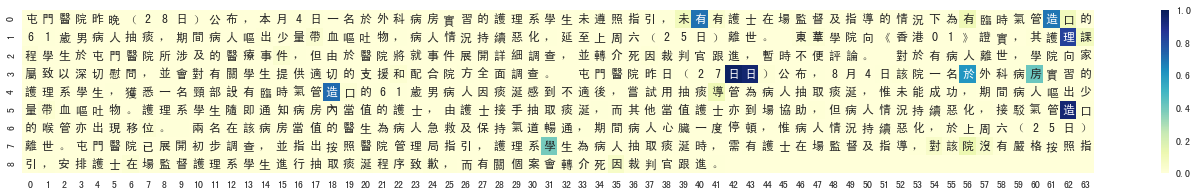

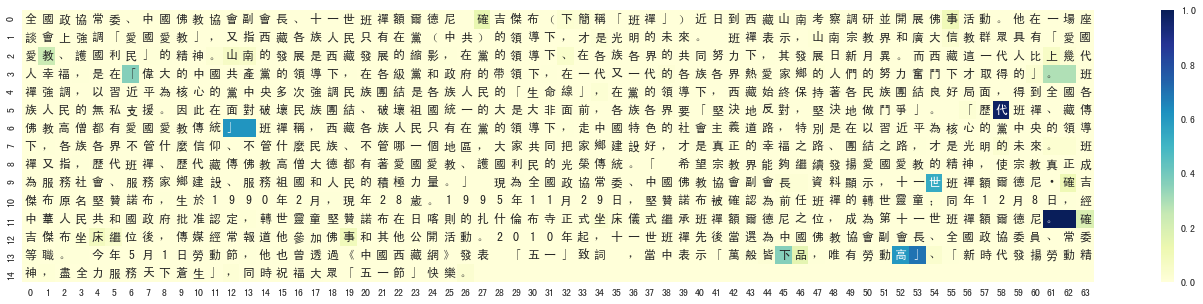

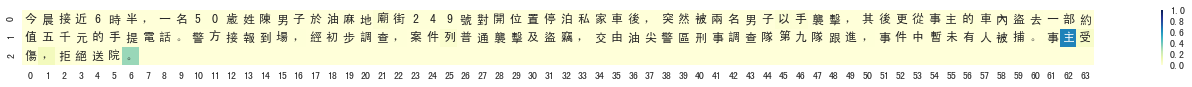

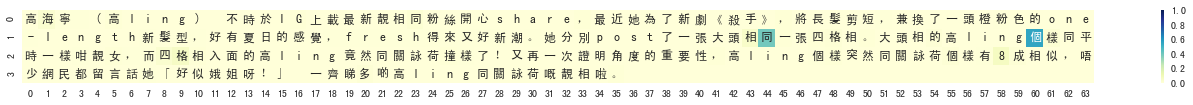

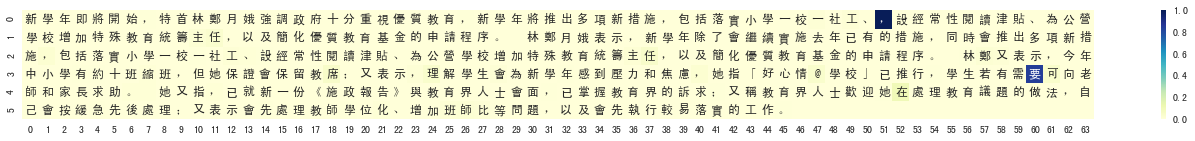

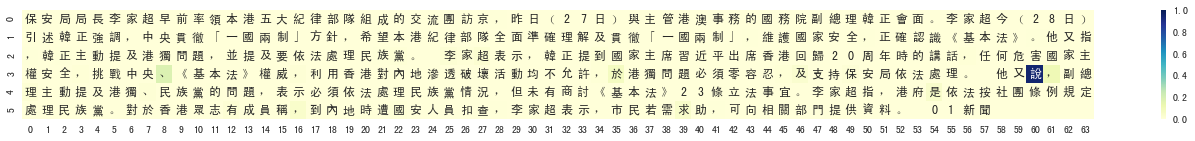

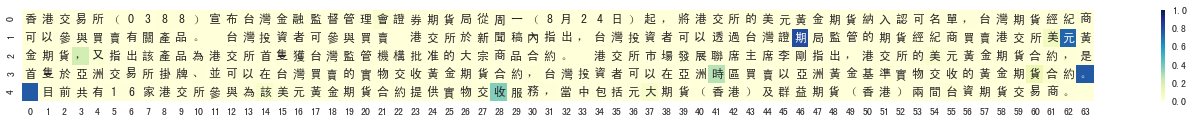

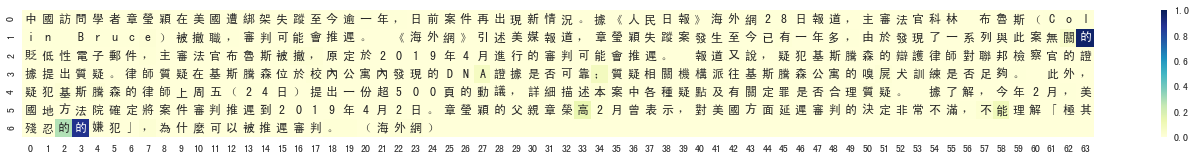

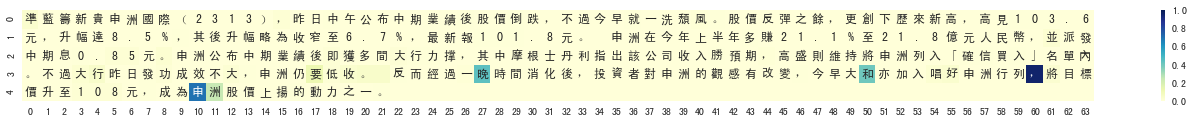

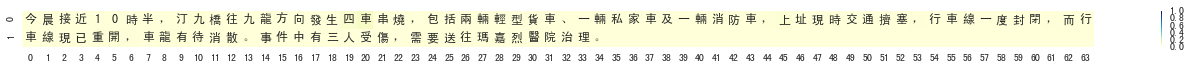

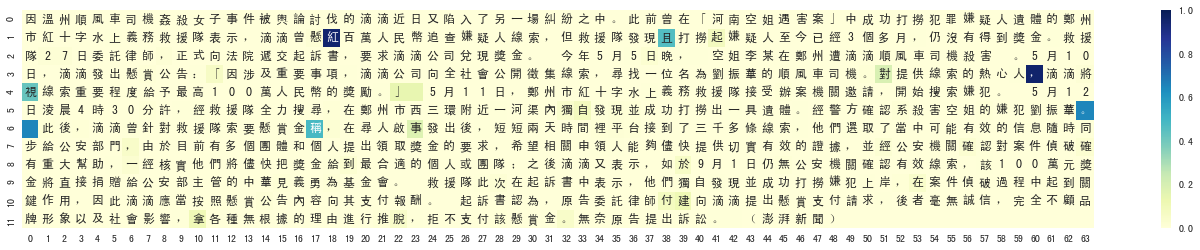

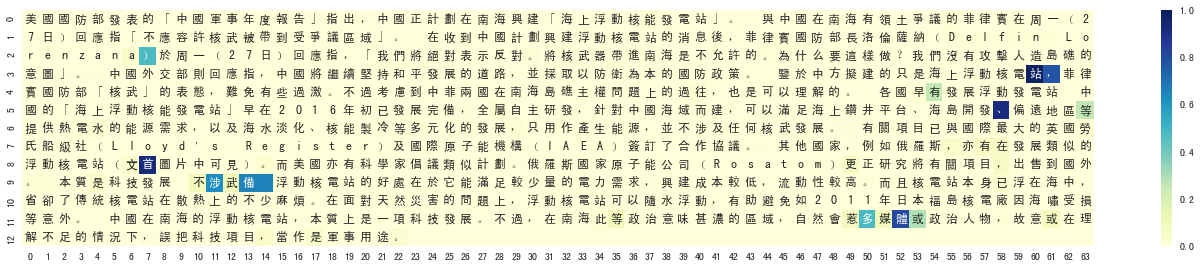

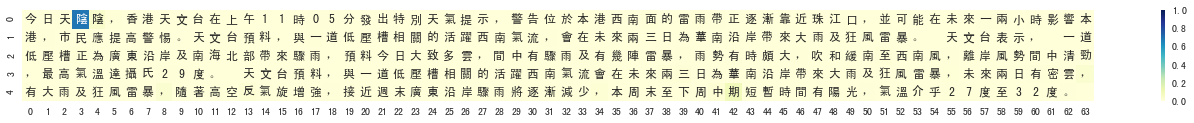

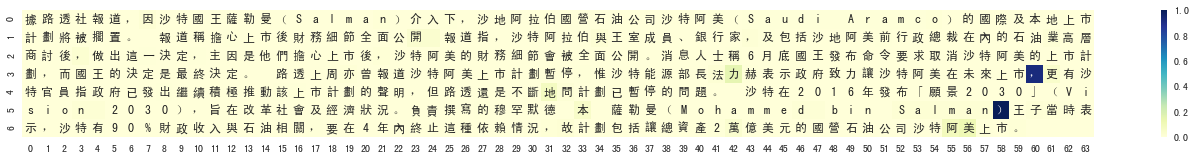

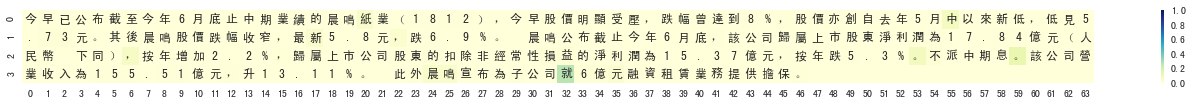

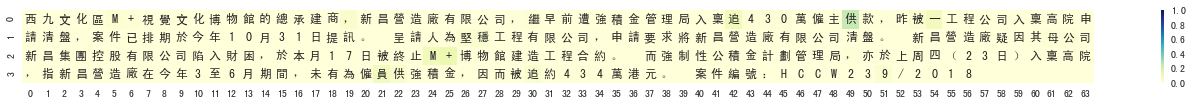

In [8]:
!gsutil -m rsync -r gs://hk01dev-typo-detection/repo .

ASSERTS_DIR = './assets' #@param{'type': 'string'}
  
import json
from utils import visualize_article
with open('./response.json', 'r') as f:
  data = [json.loads(item) for item in filter(None,f.read().split('\n'))]
  

for i in range(len(data)):
  visualize_article(ASSERTS_DIR, data[i]['text'], data[i]['predictions'])